In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

In [43]:
df = pd.read_csv('listings.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 92 columns):
id                                  3723 non-null int64
listing_url                         3723 non-null object
scrape_id                           3723 non-null float64
last_scraped                        3723 non-null object
name                                3723 non-null object
summary                             3723 non-null object
space                               3723 non-null object
description                         3723 non-null object
experiences_offered                 3723 non-null object
neighborhood_overview               3723 non-null object
notes                               3723 non-null object
transit                             3723 non-null object
thumbnail_url                       3723 non-null object
medium_url                          3723 non-null object
picture_url                         3723 non-null object
xl_picture_url                      37

In [27]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,7087327,https://www.airbnb.com/rooms/7087327,2.020000e+13,10/3/2015,Historic DC Condo-Walk to Capitol!,Professional pictures coming soon! Welcome to ...,NaN,Professional pictures coming soon! Welcome to ...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,18,NaN
1,975833,https://www.airbnb.com/rooms/975833,2.020000e+13,10/3/2015,Spacious Capitol Hill Townhouse,NaN,Beautifully renovated Capitol Hill townhouse. ...,Beautifully renovated Capitol Hill townhouse. ...,none,NaN,...,9.0,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,strict,f,f,1,2.11
2,8249488,https://www.airbnb.com/rooms/8249488,2.020000e+13,10/3/2015,Spacious/private room for single,This is an ideal room for a single traveler th...,NaN,This is an ideal room for a single traveler th...,none,NaN,...,NaN,f,NaN,NaN,f,flexible,f,f,1,1.00
3,8409022,https://www.airbnb.com/rooms/8409022,2.020000e+13,10/3/2015,A wonderful bedroom with library,Prime location right on the Potomac River in W...,NaN,Prime location right on the Potomac River in W...,none,NaN,...,NaN,f,NaN,"DISTRICT OF COLUMBIA, WASHINGTON",f,flexible,f,f,1,NaN
4,8411173,https://www.airbnb.com/rooms/8411173,2.020000e+13,10/3/2015,Downtown Silver Spring,"Hi travellers! I live in this peaceful spot, b...",This is a 750 sq ft 1 bedroom 1 bathroom. Whi...,"Hi travellers! I live in this peaceful spot, b...",none,Silver Spring is booming. You can walk to a n...,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN


In [61]:
# Modify number strings and empty values

# Replace NaN values with 0.
df.fillna(0, inplace=True)

# The values of price have '$' and ',' symbols. I'll make the values into floats.
df['price'] = (df['price'].replace( '[\$,)]','', regex=True ).astype(float))


In [56]:
# The values of security deposit and cleaning fee also have '$' and ',' symbols. I'll make the values into floats as well.

df['security_deposit'] = (df['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float))

df['cleaning_fee'] = (df['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float))


In [62]:
features = df[['host_response_rate', 'host_acceptance_rate', 'host_listings_count',  'host_total_listings_count', 'accommodates', 
                     'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 
                     'minimum_nights', 'number_of_reviews','review_scores_rating', 'review_scores_accuracy']]

In [63]:
features.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy
0,92%,91%,26,26,4,1.0,1.0,2.0,160.0,100.0,115.0,1,$0.00,1,0,0.0,0.0
1,90%,100%,1,1,6,3.0,3.0,3.0,350.0,0.0,100.0,1,$0.00,2,65,94.0,10.0
2,90%,100%,2,2,1,2.0,1.0,1.0,50.0,0.0,0.0,1,$0.00,2,1,0.0,0.0
3,100%,0,1,1,2,1.0,1.0,1.0,95.0,0.0,0.0,1,$0.00,1,0,0.0,0.0
4,92%,67%,1,1,4,1.0,1.0,1.0,50.0,450.0,15.0,2,$15.00,7,0,0.0,0.0


In [64]:
features.corr()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy
host_listings_count,1.000000,1.000000,0.021520,0.023413,0.032676,0.000237,0.161253,-0.072982,0.139745,-0.032393,0.073352,-0.067259,-0.056834,-0.066934
host_total_listings_count,1.000000,1.000000,0.021520,0.023413,0.032676,0.000237,0.161253,-0.072982,0.139745,-0.032393,0.073352,-0.067259,-0.056834,-0.066934
accommodates,0.021520,0.021520,1.000000,0.561821,0.717143,0.809479,0.503120,0.228049,0.487564,0.579822,0.013727,0.009725,-0.044564,-0.038667
bathrooms,0.023413,0.023413,0.561821,1.000000,0.684249,0.580289,0.470188,0.203722,0.352520,0.345786,0.029299,-0.047201,-0.059438,-0.059290
bedrooms,0.032676,0.032676,0.717143,0.684249,1.000000,0.709358,0.518853,0.225554,0.426533,0.475867,0.023215,-0.054205,-0.077629,-0.074979
beds,0.000237,0.000237,0.809479,0.580289,0.709358,1.000000,0.446688,0.213832,0.439567,0.519262,0.002355,-0.007366,-0.044338,-0.040275
price,0.161253,0.161253,0.503120,0.470188,0.518853,0.446688,1.000000,0.200771,0.315211,0.302968,0.014055,-0.084339,-0.186693,-0.187596
security_deposit,-0.072982,-0.072982,0.228049,0.203722,0.225554,0.213832,0.200771,1.000000,0.399305,0.229638,0.071740,-0.023476,0.033566,0.030901
cleaning_fee,0.139745,0.139745,0.487564,0.352520,0.426533,0.439567,0.315211,0.399305,1.000000,0.436759,0.093800,-0.040179,0.013188,0.014336
guests_included,-0.032393,-0.032393,0.579822,0.345786,0.475867,0.519262,0.302968,0.229638,0.436759,1.000000,-0.007047,0.058886,0.046709,0.052511


(array([4.130e+02, 2.533e+03, 5.110e+02, 1.900e+02, 4.400e+01, 2.100e+01,
        8.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

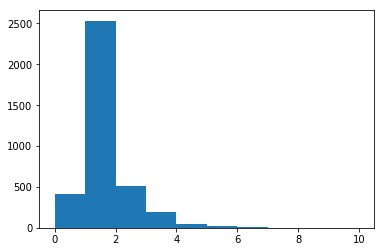

In [89]:
# What's the most common number of rooms?

plt.hist(df['bedrooms'])

In [69]:
# Let's see what the average price per room is.

bed_grouped = df.groupby('bedrooms')['price'].mean()

In [70]:
bed_grouped

bedrooms
0.0      117.000000
1.0      115.943150
2.0      223.514677
3.0      327.068421
4.0      367.568182
5.0      561.666667
6.0      664.125000
8.0     1225.000000
10.0    1250.000000
Name: price, dtype: float64

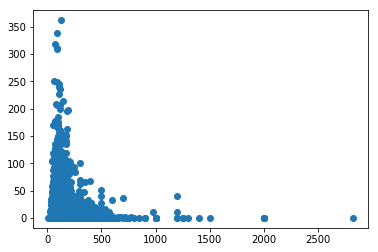

In [96]:
# I wanted to take a look at the relation between price and number of reviews.  

# This looks just like it relates to the number of bedrooms, so not telling me much new info.

plt.scatter(
    x=df['price'],
    y=df['number_of_reviews']
)

In [93]:
df['price'].corr(df['number_of_reviews'])

-0.08433880558273003

{'boxes': [<matplotlib.lines.Line2D at 0xfe05590>],
 'caps': [<matplotlib.lines.Line2D at 0xfe05d10>,
 'fliers': [<matplotlib.lines.Line2D at 0xfe0e4d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xfe0e290>],
 'whiskers': [<matplotlib.lines.Line2D at 0xfe05810>,
  <matplotlib.lines.Line2D at 0xfe05a90>]}

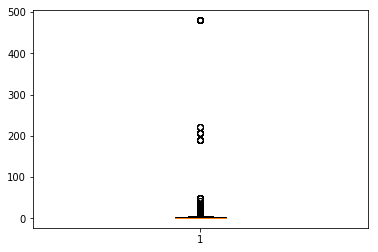

In [82]:
# I want to look at the # of locations that hosts manage.

host_listings_count = df['host_listings_count']

plt.boxplot(host_listings_count)

In [107]:
# I found one host that has 480 locations.  I want to remove this host.  It didn't work.

without_seamless_hosts = df[df['host_name'] != 'Seamless']

{'boxes': [<matplotlib.lines.Line2D at 0x12fdb5d0>],
 'caps': [<matplotlib.lines.Line2D at 0x12fdbd50>,
 'fliers': [<matplotlib.lines.Line2D at 0x12e23510>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12e232d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x12fdb850>,
  <matplotlib.lines.Line2D at 0x12fdbad0>]}

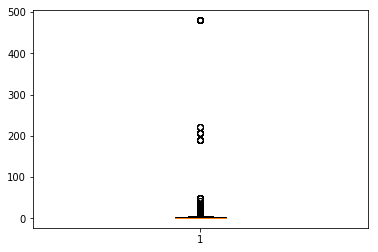

In [108]:
# It didn't work.

plt.boxplot(without_seamless_hosts['host_listings_count'])